이미지 경로: c:\Users\main\Downloads\Sample\sample_train\220701_BusanPort_00003_20.png
존재 여부: True


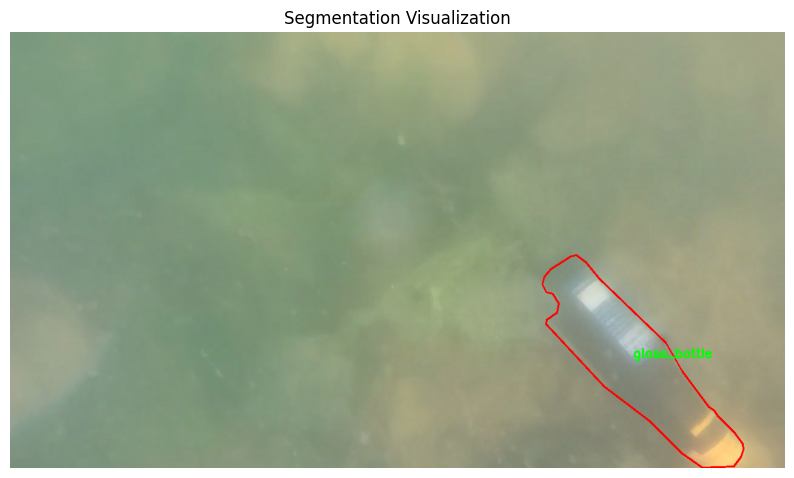

In [9]:
import json
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

# === 경로 설정 ===
json_path = "c:\\Users\\main\\Downloads\\Sample\\02.라벨링데이터\\220701_BusanPort_00003_20.json"
image_path = (
    "c:\\Users\\main\\Downloads\\Sample\\sample_train\\220701_BusanPort_00003_20.png"
)

print("이미지 경로:", image_path)
print("존재 여부:", os.path.exists(image_path))
# === JSON 로드 ===
with open(json_path, "r", encoding="utf-8") as f:
    data = json.load(f)

image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# === 폴리곤 그리기 ===
for shape in data["shapes"]:
    label = shape["label"]
    points = np.array(shape["points"], dtype=np.int32)

    # 폴리곤 그리기
    cv2.polylines(image, [points], isClosed=True, color=(255, 0, 0), thickness=2)

    # 라벨 텍스트 중앙에 표시
    centroid = points.mean(axis=0).astype(int)
    cv2.putText(
        image, label, tuple(centroid), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2
    )

# === 이미지 출력 ===
plt.figure(figsize=(10, 8))
plt.imshow(image)
plt.axis("off")
plt.title("Segmentation Visualization")
plt.show()